In [1]:
##########################################
# CREDO dataset analysis using deep autoencoder-based embedding
# Author: Tomasz Hachaj
# e-mail: thachaj@agh.edu.pl
# 2025
##########################################
# Perform eigendecomposition of raw dataset with PCA

import numpy as np
how_many_images = 3500
path_to_data = "data"
T = np.load(path_to_data + "//CREDO_T_st_" + str(how_many_images) + ".npy")
old_shape = np.load(path_to_data + "//CREDO_old_shape_st_" + str(how_many_images) + ".npy")
print('Calculate mean face')
mean_face = T.mean(axis = 1)

for i in range(how_many_images):
    T[:,i] -= mean_face
#how_many_images = v_correct.shape[1]

Calculate mean face


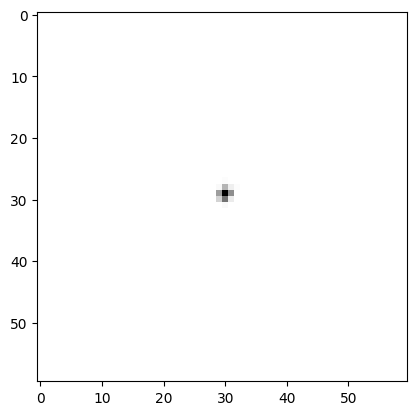

In [2]:
# display example data sample
import matplotlib.pyplot as plt
plt.imshow(np.resize(T[:,0] + mean_face, old_shape) * 255, cmap='Grays')
plt.show()
xx = np.resize(T[:,0] + mean_face, old_shape) * 255

In [3]:
# Prepare training dataset
# We will use the network to analyze the entire data set; we will not need to divide it into training, testing, and validation parts.
import numpy as np
x_train = np.transpose(T)
x_train = x_train[0:how_many_images,:]
x_train.shape

(3500, 3600)

In [22]:
# Create deep autoencoder with bottleneck size 64
import keras
from keras import layers

import numpy as np
"""
input_img = keras.Input(shape=(x_train.shape[1],))
#encoded = layers.Dense(512, activation='relu')(input_img)
#encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
#encoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
#decoded = layers.Dense(256, activation='relu')(decoded)
#decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='relu')(decoded)
"""
input_img = keras.Input(shape=(x_train.shape[1],))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(encoded)
decoded = layers.Dense(x_train.shape[1], activation='relu')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)
                #validation_data=(x_test, x_test)) <- use this if you want to test if generalization ability of autoencoder

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.4820e-04
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.0436e-04
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.9915e-04
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.9657e-04
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.9477e-04
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.9349e-04
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.9226e-04
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.9059e-04
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.8869e-04
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.8632e-04
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 5.8390e-04
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.8085e-04
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.7719e-04
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.7264e-04
Epoch 15/50
14/

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


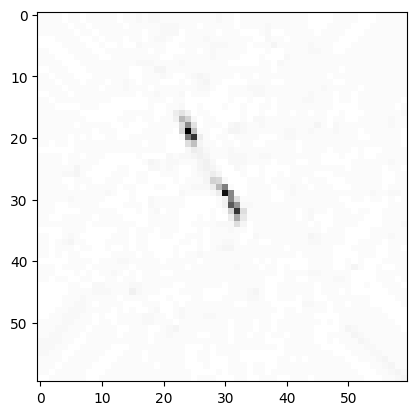

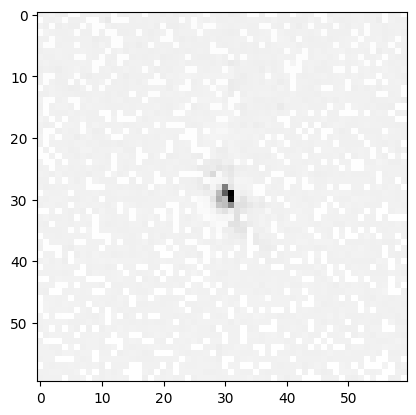

In [23]:
x_reconstructed = autoencoder.predict(x_train)
#image_id = 32
image_id = 32
# display image and its reconstruction
import matplotlib.pyplot as plt
plt.imshow(np.resize(x_train[image_id,:] + mean_face, old_shape) * 255, cmap='Grays')
plt.show()
plt.imshow(np.resize(x_reconstructed[image_id,:] + mean_face, old_shape) * 255, cmap='Grays')
plt.show()


In [24]:
# create new network from encoder only, which will be used for embedding
encoder = keras.Model(input_img, encoded)
# calculate embedding of whole dataset
embedding = encoder.predict(x_train)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


100%|██████████| 3500/3500 [00:00<00:00, 249593.04it/s]


[10, 723, 472, 865, 817, 2994, 3498, 825, 11, 530, 2539, 1753, 3247, 2109, 1708, 3384, 12, 2924, 2951, 2464, 2083, 941, 3037, 1312, 13, 191, 2085, 3454, 3057, 1482, 1643, 3003, 14, 1958, 868, 877, 2434, 449, 1324, 1796, 15, 652, 563, 1073, 2378, 2370, 101, 2752, 16, 2545, 2209, 2021, 1863, 2809, 352, 2893, 17, 3154, 1424, 610, 1595, 1151, 161, 72, 18, 3234, 2880, 2145, 1876, 1287, 142, 2686, 19, 2517, 917, 2768, 2565, 798, 2399, 39, 20, 3462, 857, 299, 1154, 537, 748, 34, 21, 2260, 1582, 2031, 1267, 2344, 1290, 2491, 22, 1135, 478, 1064, 2136, 2571, 2440, 3494, 23, 3196, 922, 781, 1819, 3101, 2377, 3433, 24, 2935, 3157, 2862, 91, 1731, 3294, 10, 25, 3201, 3085, 3358, 2063, 816, 124, 2546]
[0.0, 0.02289031818509102, 0.02920125052332878, 0.03236833214759827, 0.03309200704097748, 0.03352724388241768, 0.03469850495457649, 0.03539634868502617, 0.0, 0.0028167744167149067, 0.004141123034060001, 0.004724243655800819, 0.004741460084915161, 0.008756713010370731, 0.009719211608171463, 0.010342916

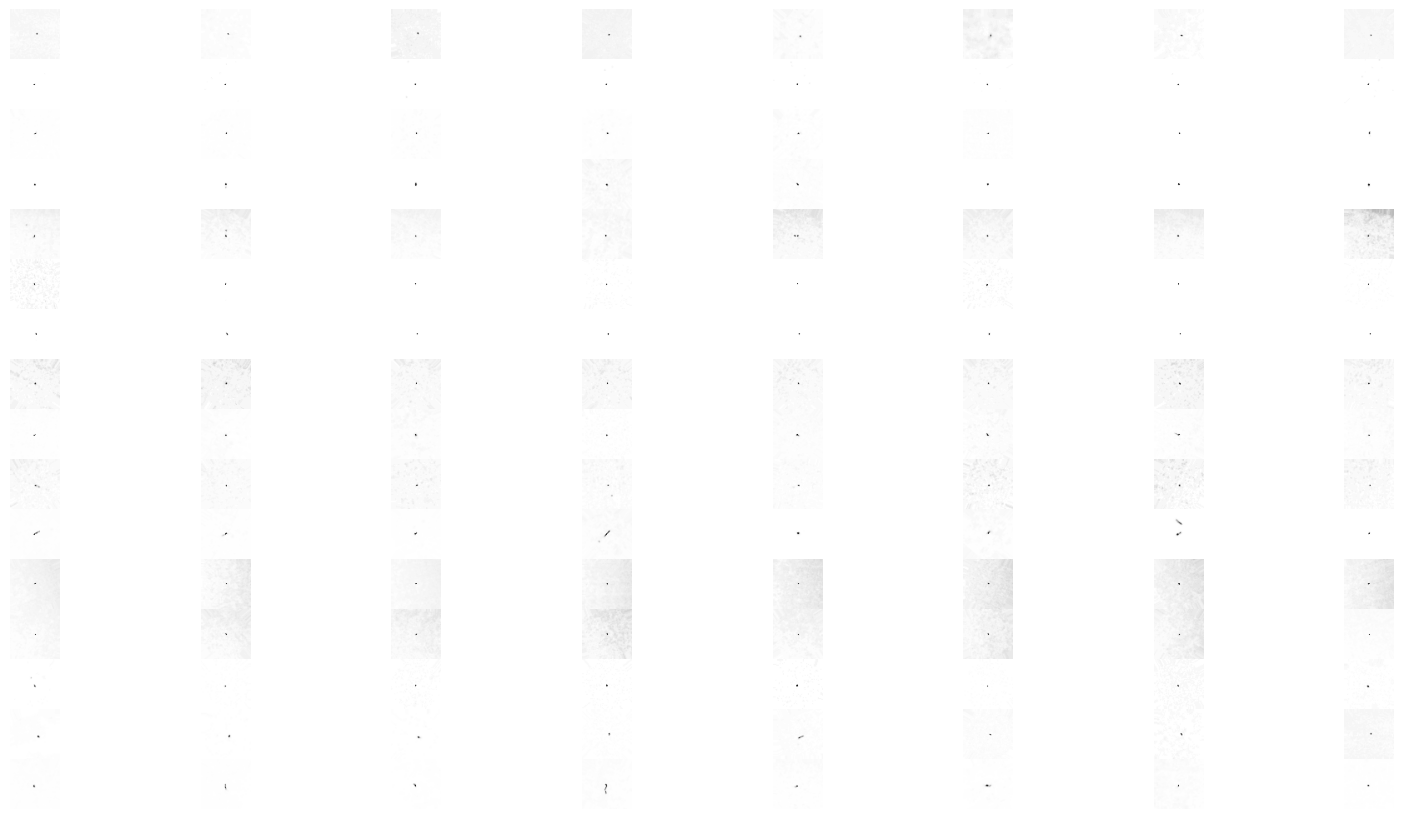

In [25]:
emb_ = embedding
dist = np.zeros(emb_.shape[0])

# set a list of images to which most similar will be found
#my_id_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
my_id_list = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
from tqdm import tqdm
def find_most_similar_from_list(x1):
    # "brute force" search
    for i in tqdm(range(emb_.shape[0])):
        dist[i] = np.linalg.norm(x1 - emb_[i,])

    indices = np.argsort(dist)
    dist_sort = dist[indices]
    return (indices, dist_sort)

my_ids = []
my_dist = []
for my_id in my_id_list:
    (indices, dist_sort) = find_most_similar_from_list(emb_[my_id,])
    _my_ids = indices[0:8]
    _my_dist = dist_sort[0:8]
    my_ids.extend(_my_ids.tolist())
    my_dist.extend(_my_dist.tolist())

import matplotlib.pyplot as plt
columns = 8
fig = plt.figure(figsize=(len(my_id_list), columns))


xx = 0
yy = 0
# display results
for aaa in range(len(my_ids)):
    img_help = T[:,my_ids[aaa]] + mean_face
    img_help = img_help.reshape(old_shape)
    aaa1 = aaa + 1
    fig.add_subplot(len(my_id_list), columns, aaa1)
    plt.axis('off')
    plt.tight_layout(pad=0.00)
    plt.imshow(img_help, cmap='Grays')

print(my_ids)
print(my_dist)
plt.show()

100%|██████████| 3500/3500 [00:00<00:00, 12333.47it/s]


[36, 60, 116, 136, 247, 384, 402, 404, 547, 689, 710, 713, 752, 770, 814, 895, 906, 935, 946, 958, 998, 1122, 1188, 1215, 1257, 1270, 1347, 1353, 1372, 1398, 1439, 1655, 1801, 1884, 1885, 1906, 1943, 1969, 2105, 2125, 2181, 2340, 2389, 2457, 2488, 2629, 2665, 2671, 2677, 2731, 2751, 2758, 2766, 2786, 2878, 2903, 3068, 3090, 3193, 3227, 3326, 3391, 3408, 3438]
[36, 60, 116, 136, 247, 384, 402, 404, 547, 689, 710, 713, 752, 770, 814, 895, 906, 935, 946, 958, 998, 1122, 1188, 1215, 1257, 1270, 1347, 1353, 1372, 1398, 1439, 1655, 1801, 1884, 1885, 1906, 1943, 1969, 2105, 2125, 2181, 2340, 2389, 2457, 2488, 2629, 2665, 2671, 2677, 2731, 2751, 2758, 2766, 2786, 2878, 2903, 3068, 3090, 3193, 3227, 3326, 3391, 3408, 3438]


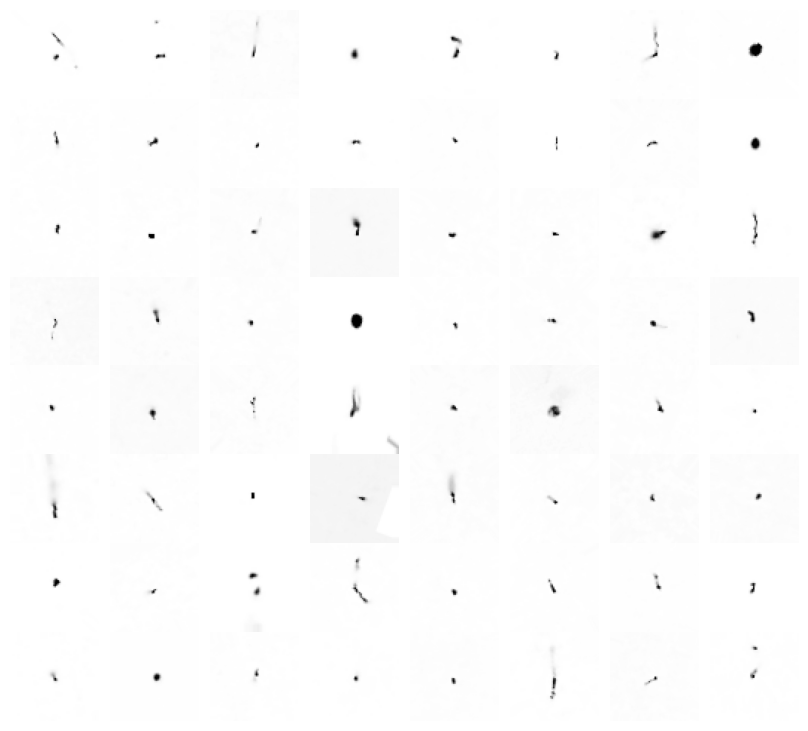

In [26]:
# density-based anomalies detection, parameters have the same role as in DBSCAN
eps=0.5
min_samples=3

# find objects which do not have at least min_samples objects in eps neighbourhood
# "fast" implementation using numba
import numba as nb
@nb.jit(nopython=True)
def func_nb(emb_array_copy, i, eps, min_samples):
    min_samples_help = 0
    x1 = emb_array_copy[i,]
    for j in range(emb_array_copy.shape[0]):
        if i != j:
            x2 = emb_array_copy[j,]
            dist = np.linalg.norm(x1 - x2)
            if dist < eps:
                min_samples_help = min_samples_help + 1
            if min_samples_help > min_samples:
                return False
    return True

my_ids = []
from tqdm import tqdm
for i in tqdm(range(emb_.shape[0])):
    if func_nb(emb_, i, eps, min_samples):
        my_ids.append(i)

# plot results
print(my_ids)
import matplotlib.pyplot as plt
import cv2
columns = 8
fig = plt.figure(figsize=(columns, columns))
rows = int(len(my_ids) / columns) + 1

columns2 = columns + 1
rows2 = int(len(my_ids) / columns2) + 1
ret_img = np.zeros((128 * rows2, 128 * columns2, 3))

xx = 0
yy = 0
for aaa in range(len(my_ids)):
    img_help = T[:,my_ids[aaa]] + mean_face
    img_help = img_help.reshape(old_shape)

    aaa1 = aaa + 1
    fig.add_subplot(rows, columns, aaa1)

    plt.axis('off')
    plt.tight_layout(pad=0.00)

    plt.imshow(img_help, cmap='Grays')


print(my_ids)
plt.show()